In this kernel I have applied transfer learning , I have used VGG16 pretrained model and designed the last FC layer manually which I have further connected to a softmax layer.

Using this I have acheived an acuracy of 94% with 4 epoch. Increasing the epochs might increase the efficiency further(you can try if you want!!)

In this kernal I have tried keeping a standard apporach so that the same code can be reused in other problems(ofcourse with minor tweeeks!!).


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-breed-identification/sample_submission.csv
/kaggle/input/dog-breed-identification/labels.csv
/kaggle/input/dog-breed-identification/train/43572ba7edf772a95f539e57afd9eb43.jpg
/kaggle/input/dog-breed-identification/train/d612ce8febeb6a1d74add4669a002530.jpg
/kaggle/input/dog-breed-identification/train/1e34a978b4d2b36592d2a3db6b3f4571.jpg
/kaggle/input/dog-breed-identification/train/99931be4da09f3b2aeb396027fa75b16.jpg
/kaggle/input/dog-breed-identification/train/b527d1075cc07fc8375378ca990ee241.jpg
/kaggle/input/dog-breed-identification/train/e562d56214836fc2621f01d53f25c44f.jpg
/kaggle/input/dog-breed-identification/train/85f0e9f401e46e30a86c5bc7fb7df968.jpg
/kaggle/input/dog-breed-identification/train/e343d8cb8acee3f75ad304a68ec68d6a.jpg
/kaggle/input/dog-breed-identification/train/11f1e40f11ca1babbcc547c5c98a1a3c.jpg
/kaggle/input/dog-breed-identification/train/dfc12676704c8931010ff087e117d2f2.jpg
/kaggle/input/dog-breed-identification/train/ad8ef2b2772064312bda4a18

/kaggle/input/dog-breed-identification/train/6fc396bea6794e80bcaeae1d6439ce6f.jpg
/kaggle/input/dog-breed-identification/train/858771bb039b3317f92b698874307126.jpg
/kaggle/input/dog-breed-identification/train/65cc3ff3e0b8041eb6e8600c1ee53e95.jpg
/kaggle/input/dog-breed-identification/train/72291724d7c5e8df27e615a177dfb151.jpg
/kaggle/input/dog-breed-identification/train/d019f029b4480dfcd04b0fb07249a9aa.jpg
/kaggle/input/dog-breed-identification/train/c21ebf600c0136815b16143e205638ff.jpg
/kaggle/input/dog-breed-identification/train/9f6a267ebf271f72f91ca0a97d60a90f.jpg
/kaggle/input/dog-breed-identification/train/2f3c1a9187f1efa78606e9bef3840d40.jpg
/kaggle/input/dog-breed-identification/train/8e68f99a0188facb43e8d767d3918c81.jpg
/kaggle/input/dog-breed-identification/train/df823d73ef4bdeda8b61e3435db0ee6b.jpg
/kaggle/input/dog-breed-identification/train/7e69e9e20cf3b78cb6d2336df72575f7.jpg
/kaggle/input/dog-breed-identification/train/1ede5aa5f18e1ed971b129195976b170.jpg
/kaggle/input/do

/kaggle/input/dog-breed-identification/train/d5d856e5a6b16e448dcbdd057e280e62.jpg
/kaggle/input/dog-breed-identification/train/2875eb5e402bdfb3c5ad40f7dacb036d.jpg
/kaggle/input/dog-breed-identification/train/1d1584d7fb1d92bae311a7e436829e08.jpg
/kaggle/input/dog-breed-identification/train/3992fe6af13ed5db7e478c6bf95f1fbc.jpg
/kaggle/input/dog-breed-identification/train/36549cf287a833afff09821e55a923d8.jpg
/kaggle/input/dog-breed-identification/train/480ba0fa99c410160b35619e9336f746.jpg
/kaggle/input/dog-breed-identification/train/1e998f09db4f87eebc1fd5cbafd4aca7.jpg
/kaggle/input/dog-breed-identification/train/12de62fb1fa5a48d596428dd5a90184a.jpg
/kaggle/input/dog-breed-identification/train/e57ca37ac086752c46e40a90139f9b26.jpg
/kaggle/input/dog-breed-identification/train/1998465c04b1bd90da3f6070201a6ce6.jpg
/kaggle/input/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg
/kaggle/input/dog-breed-identification/train/26cddb3b74e27e894d785776b00dd329.jpg
/kaggle/input/do

/kaggle/input/dog-breed-identification/train/9165ca35661772654f3b8f851d28d830.jpg
/kaggle/input/dog-breed-identification/train/e06773bd0666b3b9597b93a54e302c55.jpg
/kaggle/input/dog-breed-identification/train/b55cbc70edb5bbcb907ab4969283d9fa.jpg
/kaggle/input/dog-breed-identification/train/933e245251bc667ce6ff74f12dc998fe.jpg
/kaggle/input/dog-breed-identification/train/e208bfa575753207f240ed5619f93c41.jpg
/kaggle/input/dog-breed-identification/train/4e1a4b8dbca28978edd145617a2a0123.jpg
/kaggle/input/dog-breed-identification/train/b4387fb303b18cf2c7e49248f3bc27f8.jpg
/kaggle/input/dog-breed-identification/train/45c500a40d2bc460ed48337a8893ebc5.jpg
/kaggle/input/dog-breed-identification/train/8620ce74bccbbdae679f6db87264c233.jpg
/kaggle/input/dog-breed-identification/train/24d2e86da970f0c7ab50314a5cb2a5fd.jpg
/kaggle/input/dog-breed-identification/train/ff2523c07da7a6cbeeb7c8f8dafed24f.jpg
/kaggle/input/dog-breed-identification/train/85bfb0ee0c6071dcafd54d343a64a5d5.jpg
/kaggle/input/do

/kaggle/input/dog-breed-identification/train/6dc71162eb51b2347811e9beb934fa17.jpg
/kaggle/input/dog-breed-identification/train/f821311972e25d3dc8e8cf76a64e53e1.jpg
/kaggle/input/dog-breed-identification/train/1fc94c31099ae9b6be417f5d07b4f61a.jpg
/kaggle/input/dog-breed-identification/train/96e7a7493dcf1bbcdc6be986fc04a71c.jpg
/kaggle/input/dog-breed-identification/train/bd4dc4f436e88c6b6418140b33264130.jpg
/kaggle/input/dog-breed-identification/train/bcfeb7f43c4cde358910c70b8afb0d3b.jpg
/kaggle/input/dog-breed-identification/train/8001b079625ce8a590a8dc073869add5.jpg
/kaggle/input/dog-breed-identification/train/b2c2f184cea6a16eb97267e1eae4bc04.jpg
/kaggle/input/dog-breed-identification/train/995f929ee21cd978ccb5d6dd823b88e9.jpg
/kaggle/input/dog-breed-identification/train/5b1c52945d418bd63bf4285749e713a5.jpg
/kaggle/input/dog-breed-identification/train/73ba15dc7daeb99717b177b5ae23f5d8.jpg
/kaggle/input/dog-breed-identification/train/d00642800e4ca6d84887a93e3430ae21.jpg
/kaggle/input/do

/kaggle/input/dog-breed-identification/train/19fb6b46c01c27f8cdc3b8245875707f.jpg
/kaggle/input/dog-breed-identification/train/46e9af7814e561a5171e1405f77e1131.jpg
/kaggle/input/dog-breed-identification/train/8bf5bd677a71e574a08dfd4fe7af1461.jpg
/kaggle/input/dog-breed-identification/train/4af283a82eed700f8571046eeeffb52f.jpg
/kaggle/input/dog-breed-identification/train/43859e03ccae47c4c8016ff6a851db86.jpg
/kaggle/input/dog-breed-identification/train/0700d58c82bafe9c4edc81f902178e76.jpg
/kaggle/input/dog-breed-identification/train/c05756fc992ab5863853dafe9cf50675.jpg
/kaggle/input/dog-breed-identification/train/f5047cc73f0f6691dc0e08c93ebe26da.jpg
/kaggle/input/dog-breed-identification/train/4dfaa8dee5203f7d0d4c29a684627abc.jpg
/kaggle/input/dog-breed-identification/train/1095f3f511b5d85db6e614fc6cf58250.jpg
/kaggle/input/dog-breed-identification/train/bbf96da4759da24dbd84cce870b0f9b1.jpg
/kaggle/input/dog-breed-identification/train/b7123d5d7de79459bb6a1f62fafd7ed8.jpg
/kaggle/input/do

/kaggle/input/dog-breed-identification/test/1672018bbbc549cc43a14d9129197f08.jpg
/kaggle/input/dog-breed-identification/test/3c749b144b0e4e7191e81b15a3f960d7.jpg
/kaggle/input/dog-breed-identification/test/38a1b271ba7542f09ae044a2b0c19ad2.jpg
/kaggle/input/dog-breed-identification/test/76510d1c9a1da15997ecef0e4a7a6340.jpg
/kaggle/input/dog-breed-identification/test/be6dbff512d7875a839cd1b26e92d7c6.jpg
/kaggle/input/dog-breed-identification/test/ed1d8dfbebbb70b252cd71e165ea3d76.jpg
/kaggle/input/dog-breed-identification/test/a66352b2c080d7519964622f04b36145.jpg
/kaggle/input/dog-breed-identification/test/7a7fffb0dd56e807e0f12e2260eb7fa8.jpg
/kaggle/input/dog-breed-identification/test/4a5c31b955f39563be40af29a7c92667.jpg
/kaggle/input/dog-breed-identification/test/2970d71ee1ff6a74715309e878317b4e.jpg
/kaggle/input/dog-breed-identification/test/1e8f9ee9e95a80ea5053a886d37b8a70.jpg
/kaggle/input/dog-breed-identification/test/e246de79e4efd1145698d9c21466bbaf.jpg
/kaggle/input/dog-breed-iden

/kaggle/input/dog-breed-identification/test/71cf1e220572c48e8a22204f91eb481f.jpg
/kaggle/input/dog-breed-identification/test/26a9d1052d04bf8d3d31577e04cdb88d.jpg
/kaggle/input/dog-breed-identification/test/9df135b59caa3bf6bdbb06f1b08aa4b4.jpg
/kaggle/input/dog-breed-identification/test/126ee1ee0d0a37e1f5980a73e92703f3.jpg
/kaggle/input/dog-breed-identification/test/6325d16890b72d22008ed74b93d5d9b9.jpg
/kaggle/input/dog-breed-identification/test/5b8fe1b3769460952465a296e6f5b53a.jpg
/kaggle/input/dog-breed-identification/test/166e1d76d8d3ebceb9d33944b1353c80.jpg
/kaggle/input/dog-breed-identification/test/3c35691f75c7186041609ee99d072039.jpg
/kaggle/input/dog-breed-identification/test/f49b264ba04d042811304a9f994d8415.jpg
/kaggle/input/dog-breed-identification/test/4dae826e796b278b34544347f280ea7d.jpg
/kaggle/input/dog-breed-identification/test/8f0c59a69ee53ea445062d1428f494af.jpg
/kaggle/input/dog-breed-identification/test/66f57c8187a9fc6e9c814f66418231fd.jpg
/kaggle/input/dog-breed-iden

/kaggle/input/dog-breed-identification/test/f968527661824f3b3b7e640b646a4c3d.jpg
/kaggle/input/dog-breed-identification/test/492c1ecc6dee91c3251766eeadd4ad9d.jpg
/kaggle/input/dog-breed-identification/test/8c743a627f427dad6111a4ed0a538fc0.jpg
/kaggle/input/dog-breed-identification/test/944451b26b58e323926e66930ef1592b.jpg
/kaggle/input/dog-breed-identification/test/e29f03a924c493b29d17877204dd0205.jpg
/kaggle/input/dog-breed-identification/test/00a558277e1f03b71d8c813e03344ddf.jpg
/kaggle/input/dog-breed-identification/test/9caa3789cfa67aa2a494e43b4af09e8b.jpg
/kaggle/input/dog-breed-identification/test/430a0714247557573bdd9dabb2b02464.jpg
/kaggle/input/dog-breed-identification/test/a1ae1f13361cce0f4fa2767d2b662fc5.jpg
/kaggle/input/dog-breed-identification/test/c4e5a86214f9ac9b28c7381009b708ca.jpg
/kaggle/input/dog-breed-identification/test/f47e4614a5d7d190cf95b4b9c1e78576.jpg
/kaggle/input/dog-breed-identification/test/77b95f2b2c71f5f5bdd4e777ce63ea72.jpg
/kaggle/input/dog-breed-iden

/kaggle/input/dog-breed-identification/test/334e49cb4245a8d461d222dcbb336ed0.jpg
/kaggle/input/dog-breed-identification/test/653e48c2236dc5b7d77e1687e5a91c3b.jpg
/kaggle/input/dog-breed-identification/test/e1f7ec4bd372612f53411026aaabf233.jpg
/kaggle/input/dog-breed-identification/test/b5c279466085e036e36b360bd41830d5.jpg
/kaggle/input/dog-breed-identification/test/e48f3d4f0514a07f4777a30f01d32ea9.jpg
/kaggle/input/dog-breed-identification/test/7f00d7b5531e1051f15de7219aeeb6db.jpg
/kaggle/input/dog-breed-identification/test/573e9e83d7f64f23f038542ca719d793.jpg
/kaggle/input/dog-breed-identification/test/df903a0522873bebca93d1d93bc60bc4.jpg
/kaggle/input/dog-breed-identification/test/7cbc041e79135a572aad87904b5c9c57.jpg
/kaggle/input/dog-breed-identification/test/46a4c593405150f4cebb888464e64307.jpg
/kaggle/input/dog-breed-identification/test/03281ed4ff1f0f4265d9f3d9940a839e.jpg
/kaggle/input/dog-breed-identification/test/7a23ff98d2a0f7a78c0e23d0d2a7ee88.jpg
/kaggle/input/dog-breed-iden

/kaggle/input/dog-breed-identification/test/8e53560770c4f22fab9c92cafed86bcf.jpg
/kaggle/input/dog-breed-identification/test/392ed88856b36bcc3a2e694f321b57fb.jpg
/kaggle/input/dog-breed-identification/test/efcb9740d2350a5aba4344ae5994eb37.jpg
/kaggle/input/dog-breed-identification/test/85505d3654e57f79c2044bd69fce95bd.jpg
/kaggle/input/dog-breed-identification/test/07be196f3517e9afe16c0ddc61824628.jpg
/kaggle/input/dog-breed-identification/test/d3c526961a354ba6f36ef9b39ad45e66.jpg
/kaggle/input/dog-breed-identification/test/b212eb9c23227e1bda237397eedeeb17.jpg
/kaggle/input/dog-breed-identification/test/0d6a4703b8989cb5c5402b15e7efbdda.jpg
/kaggle/input/dog-breed-identification/test/a26011e99833ab06645e87c6b6c10b97.jpg
/kaggle/input/dog-breed-identification/test/7665e181f1a182b89a4d359b64baed4f.jpg
/kaggle/input/dog-breed-identification/test/6b62eee9c188519f2b1bcf65493b4129.jpg
/kaggle/input/dog-breed-identification/test/9420a80439095a8f690aae1daac448c4.jpg
/kaggle/input/dog-breed-iden

/kaggle/input/dog-breed-identification/test/959bc1618cb81e9aa244a52db1246076.jpg
/kaggle/input/dog-breed-identification/test/69e9ebfeb9dff1365e790a3c71c484ea.jpg
/kaggle/input/dog-breed-identification/test/fc7576b5d6dcd4b07580a8b692222787.jpg
/kaggle/input/dog-breed-identification/test/c4405533c104e226e012d1285b8e9f38.jpg
/kaggle/input/dog-breed-identification/test/6942d864ed18d6e416368e366c51062f.jpg
/kaggle/input/dog-breed-identification/test/14c184c41c90fdcca3411e730ae4737c.jpg
/kaggle/input/dog-breed-identification/test/5c095aa2f21eb12b758eecc93ebee3a5.jpg
/kaggle/input/dog-breed-identification/test/c87b574003ac9568970b70f29702bf85.jpg
/kaggle/input/dog-breed-identification/test/10863e6d9d1cb526cc9d90f30a585719.jpg
/kaggle/input/dog-breed-identification/test/1fd10c43fc5c263d3c9e34fb2c3fb386.jpg
/kaggle/input/dog-breed-identification/test/be2633a6ffcff921f02898956504ec61.jpg
/kaggle/input/dog-breed-identification/test/3f6f5181044c68f02741de688ddf5ed5.jpg
/kaggle/input/dog-breed-iden

# Import all required libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img

Using TensorFlow backend.


In [3]:
start = dt.datetime.now()

# Loading required data

In [4]:
label=pd.read_csv("/kaggle/input/dog-breed-identification/labels.csv")
label

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

# Selecting TOP 16

In [5]:
label_df=pd.DataFrame(label['breed'].value_counts()).reset_index()
label_df.columns=['breed_name','count']
label_df=label_df.head(16)
label_df

breed_name  count
0     scottish_deerhound    126
1            maltese_dog    117
2           afghan_hound    116
3            entlebucher    115
4   bernese_mountain_dog    114
5               shih-tzu    112
6             pomeranian    111
7         great_pyrenees    111
8                basenji    110
9                samoyed    109
10       tibetan_terrier    107
11              airedale    107
12                 cairn    106
13              leonberg    106
14                beagle    105
15      japanese_spaniel    105

In [6]:
label_df.sort_values(by="count",ascending=False)

breed_name  count
0     scottish_deerhound    126
1            maltese_dog    117
2           afghan_hound    116
3            entlebucher    115
4   bernese_mountain_dog    114
5               shih-tzu    112
6             pomeranian    111
7         great_pyrenees    111
8                basenji    110
9                samoyed    109
10       tibetan_terrier    107
11              airedale    107
12                 cairn    106
13              leonberg    106
14                beagle    105
15      japanese_spaniel    105

In [7]:
label = label[label['breed'].isin(label_df['breed_name'])]

Adding .jpg extension

In [8]:
    
label['id_ext']=label['id'].apply(lambda x:x+'.jpg')
label=label.reset_index()
label=label.drop(['index','id'],axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
label.head()

breed                                id_ext
0             basenji  003df8b8a8b05244b1d920bb6cf451f9.jpg
1  scottish_deerhound  0042188c895a2f14ef64a918ed9c7b64.jpg
2         maltese_dog  00693b8bc2470375cc744a6391d397ec.jpg
3               cairn  00bee065dcec471f26394855c5c2f3de.jpg
4     tibetan_terrier  013f8fdf6d638c7bb042f5f17e8a9fdc.jpg

# One hot coding of breeds

In [10]:
label_onehot=pd.get_dummies(label,columns=['breed'],prefix=None)

In [11]:
label_onehot

id_ext  breed_afghan_hound  \
0     003df8b8a8b05244b1d920bb6cf451f9.jpg                   0   
1     0042188c895a2f14ef64a918ed9c7b64.jpg                   0   
2     00693b8bc2470375cc744a6391d397ec.jpg                   0   
3     00bee065dcec471f26394855c5c2f3de.jpg                   0   
4     013f8fdf6d638c7bb042f5f17e8a9fdc.jpg                   0   
...                                    ...                 ...   
1772  ffa4e1bf959425bad9228b04af40ac76.jpg                   0   
1773  ffc532991d3cd7880d27a449ed1c4770.jpg                   0   
1774  ffcde16e7da0872c357fbc7e2168c05f.jpg                   0   
1775  ffcffab7e4beef9a9b8076ef2ca51909.jpg                   0   
1776  ffe2ca6c940cddfee68fa3cc6c63213f.jpg                   0   

      breed_airedale  breed_basenji  breed_beagle  breed_bernese_mountain_dog  \
0                  0              1             0                           0   
1                  0              0             0                           0   
2                  0              0             0                           0   
3                  0              0             0                           0   
4                  0              0             0                           0   
...              ...            ...           ...                         ...   
1772               0              1             0                           0   
1773               0              0             0                           0   
1774               1              0             0                           0   
1775               0              0             0                           0   
1776               1              0             0                           0   

      breed_cairn  breed_entlebucher  breed_great_pyrenees  \
0               0                  0                     0   
1               0                  0                     0   
2               0                  0                     0   
3               1                  0                     0   
4               0                  0                     0   
...           ...                ...                   ...   
1772            0                  0                     0   
1773            0                  0                     0   
1774            0                  0                     0   
1775            0                  0                     0   
1776            0                  0                     0   

      breed_japanese_spaniel  breed_leonberg  breed_maltese_dog  \
0                          0               0                  0   
1                          0               0                  0   
2                          0               0                  1   
3                          0               0                  0   
4                          0               0                  0   
...                      ...             ...                ...   
1772                       0               0                  0   
1773                       0               0                  0   
1774                       0               0                  0   
1775                       0               0                  0   
1776                       0               0                  0   

      breed_pomeranian  breed_samoyed  breed_scottish_deerhound  \
0                    0              0                         0   
1                    0              0                         1   
2                    0              0                         0   
3                    0              0                         0   
4                    0              0                         0   
...                ...            ...                       ...   
1772                 0              0                         0   
1773                 0              0                         0   
1774                 0              0                         0   
1775                 0              1             

In [12]:
label_onehot.columns

Index(['id_ext', 'breed_afghan_hound', 'breed_airedale', 'breed_basenji',
       'breed_beagle', 'breed_bernese_mountain_dog', 'breed_cairn',
       'breed_entlebucher', 'breed_great_pyrenees', 'breed_japanese_spaniel',
       'breed_leonberg', 'breed_maltese_dog', 'breed_pomeranian',
       'breed_samoyed', 'breed_scottish_deerhound', 'breed_shih-tzu',
       'breed_tibetan_terrier'],
      dtype='object')

# Renaming the columns

In [13]:
label_onehot.columns = label_onehot.columns.str.replace(r'breed_', '')

In [14]:
#label_onehot
label_onehot=label_onehot.rename(columns={'id_ext':'id'})

In [15]:
label_onehot

id  afghan_hound  airedale  basenji  \
0     003df8b8a8b05244b1d920bb6cf451f9.jpg             0         0        1   
1     0042188c895a2f14ef64a918ed9c7b64.jpg             0         0        0   
2     00693b8bc2470375cc744a6391d397ec.jpg             0         0        0   
3     00bee065dcec471f26394855c5c2f3de.jpg             0         0        0   
4     013f8fdf6d638c7bb042f5f17e8a9fdc.jpg             0         0        0   
...                                    ...           ...       ...      ...   
1772  ffa4e1bf959425bad9228b04af40ac76.jpg             0         0        1   
1773  ffc532991d3cd7880d27a449ed1c4770.jpg             0         0        0   
1774  ffcde16e7da0872c357fbc7e2168c05f.jpg             0         1        0   
1775  ffcffab7e4beef9a9b8076ef2ca51909.jpg             0         0        0   
1776  ffe2ca6c940cddfee68fa3cc6c63213f.jpg             0         1        0   

      beagle  bernese_mountain_dog  cairn  entlebucher  great_pyrenees  \
0          0                     0      0            0               0   
1          0                     0      0            0               0   
2          0                     0      0            0               0   
3          0                     0      1            0               0   
4          0                     0      0            0               0   
...      ...                   ...    ...          ...             ...   
1772       0                     0      0            0               0   
1773       0                     0      0            0               0   
1774       0                     0      0            0               0   
1775       0                     0      0            0               0   
1776       0                     0      0            0               0   

      japanese_spaniel  leonberg  maltese_dog  pomeranian  samoyed  \
0                    0         0            0           0        0   
1                    0         0            0           0        0   
2                    0         0            1           0        0   
3                    0         0            0           0        0   
4                    0         0            0           0        0   
...                ...       ...          ...         ...      ...   
1772                 0         0            0           0        0   
1773                 0         0            0           0        0   
1774                 0         0            0           0        0   
1775                 0         0            0           0        1   
1776                 0         0            0           0        0   

      scottish_deerhound  shih-tzu  tibetan_terrier  
0                      0         0                0  
1                      1         0                0  
2                      0         0                0  
3                      0         0                0  
4                      0         0                1  
...                  ...       ...              ...  
1772                   0         0                0  
1773                   0         0                1  
1774                   0         0                0  
1775                   0         0                0  
1776                   0         0                0  

[1777 rows x 17 columns]

# Checking a random sample

In [16]:
import random
sample=random.choice(label_onehot['id'])
sample

'b1cc94466334a8caebf966aad4f50484.jpg'

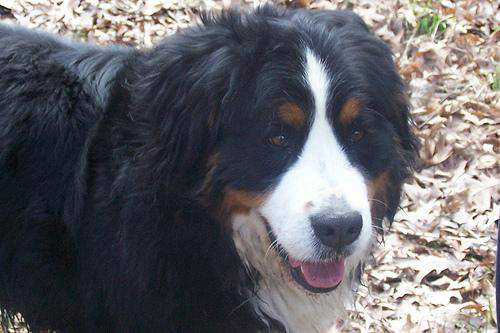

In [17]:
image=load_img("/kaggle/input/dog-breed-identification/train/"+sample)
image

# Train and Test split

In [18]:
train_df, validate_df = train_test_split(label_onehot, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [19]:
train_df.shape,validate_df.shape

((1599, 18), (178, 18))

In [20]:
train_df

index                                    id  afghan_hound  airedale  \
0       677  66cdad5e53ed47f780de00dac40dcf4f.jpg             0         0   
1      1502  d953e41d5f3e8ff39a48a48db4d146a3.jpg             0         0   
2      1623  e86a88391d017cc3807cc9653a4a7290.jpg             0         0   
3      1676  efe80b984a40901f78132386e1ac3c4b.jpg             1         0   
4       986  91d8c78f0201eb7620fe1cea512ab108.jpg             1         0   
...     ...                                   ...           ...       ...   
1594    371  3adb3fb45e6331c8905cb6cf85db9f11.jpg             0         1   
1595    875  8436be99589db6a99cfac1b894421ea6.jpg             0         0   
1596    153  1493bf7f5cb1ca62b4e0772d9edc702e.jpg             0         0   
1597    698  69f0ad7b0b8ca686c1636067726a05e2.jpg             0         0   
1598   1258  b7c6ac4395621347dd6203f421a5ac28.jpg             0         0   

      basenji  beagle  bernese_mountain_dog  cairn  entlebucher  \
0           1       0                     0      0            0   
1           1       0                     0      0            0   
2           1       0                     0      0            0   
3           0       0                     0      0            0   
4           0       0                     0      0            0   
...       ...     ...                   ...    ...          ...   
1594        0       0                     0      0            0   
1595        0       1                     0      0            0   
1596        1       0                     0      0            0   
1597        0       0                     0      0            1   
1598        0       0                     0      0            0   

      great_pyrenees  japanese_spaniel  leonberg  maltese_dog  pomeranian  \
0                  0                 0         0            0           0   
1                  0                 0         0            0           0   
2                  0                 0         0            0           0   
3                  0                 0         0            0           0   
4                  0                 0         0            0           0   
...              ...               ...       ...          ...         ...   
1594               0                 0         0            0           0   
1595               0                 0         0            0           0   
1596               0                 0         0            0           0   
1597               0                 0         0            0           0   
1598               0                 0         0            0           0   

      samoyed  scottish_deerhound  shih-tzu  tibetan_terrier  
0           0                   0         0                0  
1           0                   0         0                0  
2           0                   0         0                0  
3           0                   0         0                0  
4           0                   0         0                0  
...       ...                 ...       ...              ...  
1594        0                   0         0                0  
1595        0                   0         0                0  
1596        0                   0         0                0  
1597        0                   0         0                0  
1598        0                   0         0                1  

[1599 rows x 18 columns]

# VGG 16 pretrained model

In [21]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 4
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(16, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [22]:
train_df

index                                    id  afghan_hound  airedale  \
0       677  66cdad5e53ed47f780de00dac40dcf4f.jpg             0         0   
1      1502  d953e41d5f3e8ff39a48a48db4d146a3.jpg             0         0   
2      1623  e86a88391d017cc3807cc9653a4a7290.jpg             0         0   
3      1676  efe80b984a40901f78132386e1ac3c4b.jpg             1         0   
4       986  91d8c78f0201eb7620fe1cea512ab108.jpg             1         0   
...     ...                                   ...           ...       ...   
1594    371  3adb3fb45e6331c8905cb6cf85db9f11.jpg             0         1   
1595    875  8436be99589db6a99cfac1b894421ea6.jpg             0         0   
1596    153  1493bf7f5cb1ca62b4e0772d9edc702e.jpg             0         0   
1597    698  69f0ad7b0b8ca686c1636067726a05e2.jpg             0         0   
1598   1258  b7c6ac4395621347dd6203f421a5ac28.jpg             0         0   

      basenji  beagle  bernese_mountain_dog  cairn  entlebucher  \
0           1       0                     0      0            0   
1           1       0                     0      0            0   
2           1       0                     0      0            0   
3           0       0                     0      0            0   
4           0       0                     0      0            0   
...       ...     ...                   ...    ...          ...   
1594        0       0                     0      0            0   
1595        0       1                     0      0            0   
1596        1       0                     0      0            0   
1597        0       0                     0      0            1   
1598        0       0                     0      0            0   

      great_pyrenees  japanese_spaniel  leonberg  maltese_dog  pomeranian  \
0                  0                 0         0            0           0   
1                  0                 0         0            0           0   
2                  0                 0         0            0           0   
3                  0                 0         0            0           0   
4                  0                 0         0            0           0   
...              ...               ...       ...          ...         ...   
1594               0                 0         0            0           0   
1595               0                 0         0            0           0   
1596               0                 0         0            0           0   
1597               0                 0         0            0           0   
1598               0                 0         0            0           0   

      samoyed  scottish_deerhound  shih-tzu  tibetan_terrier  
0           0                   0         0                0  
1           0                   0         0                0  
2           0                   0         0                0  
3           0                   0         0                0  
4           0                   0         0                0  
...       ...                 ...       ...              ...  
1594        0                   0         0                0  
1595        0                   0         0                0  
1596        0                   0         0                0  
1597        0                   0         0                0  
1598        0                   0         0                1  

[1599 rows x 18 columns]

In [23]:
train_df.columns

Index(['index', 'id', 'afghan_hound', 'airedale', 'basenji', 'beagle',
       'bernese_mountain_dog', 'cairn', 'entlebucher', 'great_pyrenees',
       'japanese_spaniel', 'leonberg', 'maltese_dog', 'pomeranian', 'samoyed',
       'scottish_deerhound', 'shih-tzu', 'tibetan_terrier'],
      dtype='object')

# Data Augmentation

Training Data

In [24]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/kaggle/input/dog-breed-identification/train", 
    x_col='id',
    y_col=['afghan_hound', 'airedale', 'basenji', 'beagle',
       'bernese_mountain_dog', 'cairn', 'entlebucher', 'great_pyrenees',
       'japanese_spaniel', 'leonberg', 'maltese_dog', 'pomeranian', 'samoyed',
       'scottish_deerhound', 'shih-tzu', 'tibetan_terrier'],
    class_mode='raw',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 1599 validated image filenames.


Validation Data

In [25]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/kaggle/input/dog-breed-identification/train", 
    x_col='id',
    y_col=['afghan_hound', 'airedale', 'basenji', 'beagle',
       'bernese_mountain_dog', 'cairn', 'entlebucher', 'great_pyrenees',
       'japanese_spaniel', 'leonberg', 'maltese_dog', 'pomeranian', 'samoyed',
       'scottish_deerhound', 'shih-tzu', 'tibetan_terrier'],
    class_mode='raw',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 178 validated image filenames.


# Example of Data AUgmentation

Found 1 validated image filenames.


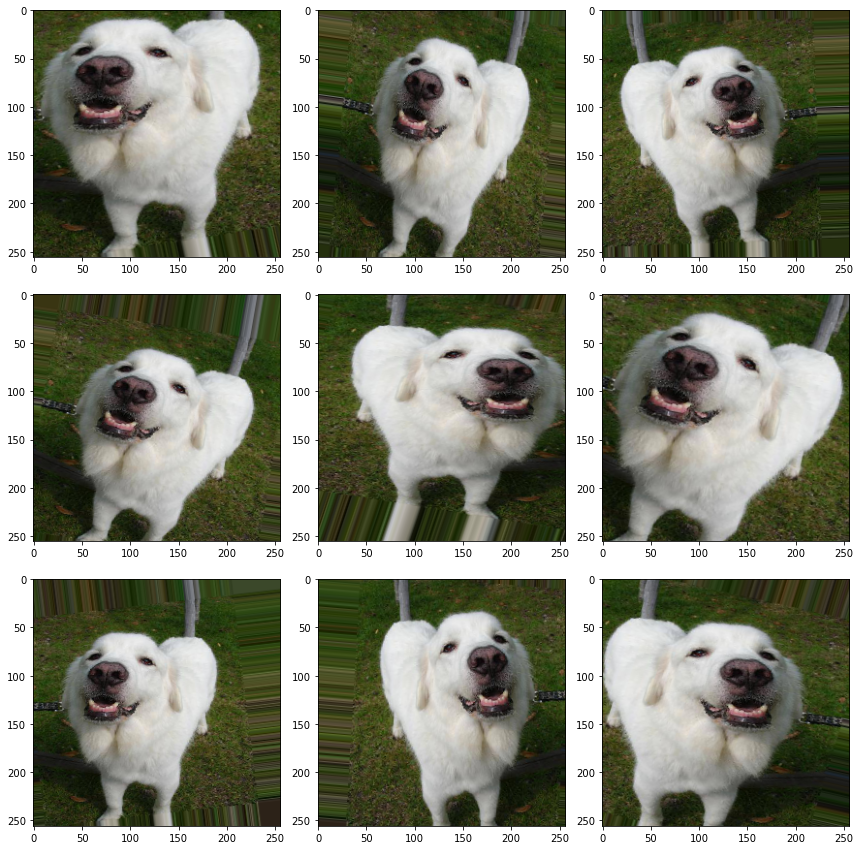

In [26]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/kaggle/input/dog-breed-identification/train/", 
    x_col='id',
    y_col=['afghan_hound', 'airedale', 'basenji', 'beagle',
       'bernese_mountain_dog', 'cairn', 'entlebucher', 'great_pyrenees',
       'japanese_spaniel', 'leonberg', 'maltese_dog', 'pomeranian', 'samoyed',
       'scottish_deerhound', 'shih-tzu', 'tibetan_terrier'],
    class_mode='raw',
)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fit the model, accuracy 94%

In [27]:
# fine-tune the model
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/4
99/99 [==============================] - 39s 390ms/step - loss: 0.2854 - accuracy: 0.9331 - val_loss: 0.2485 - val_accuracy: 0.9375
Epoch 2/4
99/99 [==============================] - 34s 343ms/step - loss: 0.2694 - accuracy: 0.9354 - val_loss: 0.2447 - val_accuracy: 0.9375
Epoch 3/4
99/99 [==============================] - 33s 336ms/step - loss: 0.2627 - accuracy: 0.9364 - val_loss: 0.2318 - val_accuracy: 0.9375
Epoch 4/4
99/99 [==============================] - 33s 335ms/step - loss: 0.2589 - accuracy: 0.9371 - val_loss: 0.2368 - val_accuracy: 0.9375


In [28]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.937500  ;  loss = 0.230591 


In [29]:
validate_df

index                                    id  afghan_hound  airedale  \
0      271  2917c652aa90dd5908994b25c10ba674.jpg             0         0   
1     1754  fb9c8b7e0b70b201898d930ed71163b6.jpg             0         0   
2     1546  df0b926ab57cef7c005b47cd2dc3f44d.jpg             0         0   
3     1266  b8a6ef891fb512189f283b38922e7ab8.jpg             0         0   
4     1743  fa24ae09f6c25172009016b9dbec322d.jpg             0         1   
..     ...                                   ...           ...       ...   
173    296  2cc1f4d5ad3ba20ed20756531f78fa05.jpg             0         1   
174   1014  95fddaeff7bee1d481cff457b5401c7f.jpg             0         0   
175    405  3f0ef4652899749d98df8a05a576239b.jpg             0         0   
176    720  6d49de8f03116d2fcf3eb6942a9c6233.jpg             0         1   
177    989  928f281ca2a484573ffa2d63813454f3.jpg             0         1   

     basenji  beagle  bernese_mountain_dog  cairn  entlebucher  \
0          0       0                     1      0            0   
1          0       0                     0      0            0   
2          0       0                     0      0            1   
3          0       0                     0      0            0   
4          0       0                     0      0            0   
..       ...     ...                   ...    ...          ...   
173        0       0                     0      0            0   
174        0       0                     0      0            0   
175        0       0                     0      0            0   
176        0       0                     0      0            0   
177        0       0                     0      0            0   

     great_pyrenees  japanese_spaniel  leonberg  maltese_dog  pomeranian  \
0                 0                 0         0            0           0   
1                 0                 0         0            0           0   
2                 0                 0         0            0           0   
3                 0                 0         0            1           0   
4                 0                 0         0            0           0   
..              ...               ...       ...          ...         ...   
173               0                 0         0            0           0   
174               1                 0         0            0           0   
175               0                 0         0            0           0   
176               0                 0         0            0           0   
177               0                 0         0            0           0   

     samoyed  scottish_deerhound  shih-tzu  tibetan_terrier  
0          0                   0         0                0  
1          0                   0         0                1  
2          0                   0         0                0  
3          0                   0         0                0  
4          0                   0         0                0  
..       ...                 ...       ...              ...  
173        0                   0         0                0  
174        0                   0         0                0  
175        0                   0         0                1  
176        0                   0         0                0  
177        0                   0         0                0  

[178 rows x 18 columns]

In [30]:
def get_dog(row):
    for i in validate_df.columns[2:]:
        if row[i]==1:
            return i        
validate_df['breed']=validate_df.apply(get_dog,axis=1)

In [31]:
validate_df

index                                    id  afghan_hound  airedale  \
0      271  2917c652aa90dd5908994b25c10ba674.jpg             0         0   
1     1754  fb9c8b7e0b70b201898d930ed71163b6.jpg             0         0   
2     1546  df0b926ab57cef7c005b47cd2dc3f44d.jpg             0         0   
3     1266  b8a6ef891fb512189f283b38922e7ab8.jpg             0         0   
4     1743  fa24ae09f6c25172009016b9dbec322d.jpg             0         1   
..     ...                                   ...           ...       ...   
173    296  2cc1f4d5ad3ba20ed20756531f78fa05.jpg             0         1   
174   1014  95fddaeff7bee1d481cff457b5401c7f.jpg             0         0   
175    405  3f0ef4652899749d98df8a05a576239b.jpg             0         0   
176    720  6d49de8f03116d2fcf3eb6942a9c6233.jpg             0         1   
177    989  928f281ca2a484573ffa2d63813454f3.jpg             0         1   

     basenji  beagle  bernese_mountain_dog  cairn  entlebucher  \
0          0       0                     1      0            0   
1          0       0                     0      0            0   
2          0       0                     0      0            1   
3          0       0                     0      0            0   
4          0       0                     0      0            0   
..       ...     ...                   ...    ...          ...   
173        0       0                     0      0            0   
174        0       0                     0      0            0   
175        0       0                     0      0            0   
176        0       0                     0      0            0   
177        0       0                     0      0            0   

     great_pyrenees  japanese_spaniel  leonberg  maltese_dog  pomeranian  \
0                 0                 0         0            0           0   
1                 0                 0         0            0           0   
2                 0                 0         0            0           0   
3                 0                 0         0            1           0   
4                 0                 0         0            0           0   
..              ...               ...       ...          ...         ...   
173               0                 0         0            0           0   
174               1                 0         0            0           0   
175               0                 0         0            0           0   
176               0                 0         0            0           0   
177               0                 0         0            0           0   

     samoyed  scottish_deerhound  shih-tzu  tibetan_terrier  \
0          0                   0         0                0   
1          0                   0         0                1   
2          0                   0         0                0   
3          0                   0         0                0   
4          0                   0         0                0   
..       ...                 ...       ...              ...   
173        0                   0         0                0   
174        0                   0         0                0   
175        0                   0         0                1   
176        0                   0         0                0   
177        0                   0         0                0   

                    breed  
0    bernese_mountain_dog  
1         tibetan_terrier  
2             entlebucher  
3             maltese_dog  
4                airedale  
..                    ...  
173              airedale  
174        great_pyrenees  
175       tibetan_terrier  
176              airedale  
177              airedale  

[178 rows x 19 columns]

In [32]:
validate_df=validate_df[['id','breed']]

In [33]:
validate_df.shape

(178, 2)

# Checking output from validata data to check accuracy

b8a6ef891fb512189f283b38922e7ab8.jpg
c36626ef165cd73783a2e760aaa2fc72.jpg
707acb2cbc6c351181a087fc94c4b05f.jpg
69a16ac651167cc990b208b596491a91.jpg
113ef2bb9e14d89f927314f73d573313.jpg
5d5a52c3956cae47168589a8199d78f4.jpg
fc879f14ec130d86a2479e8d869908cd.jpg
9d2451f69ee64a6d605739f98cb627d7.jpg
89c587a6a853c816d3cea9337a8e814a.jpg


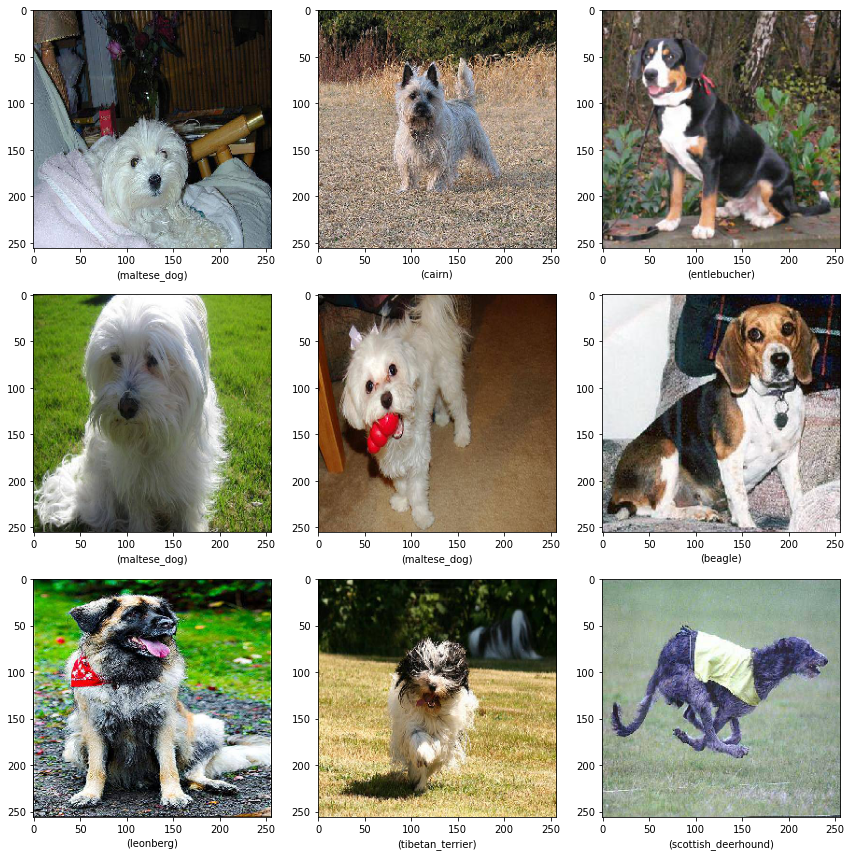

In [34]:
sample_test = validate_df.sample(n=9).reset_index()
#print(sample_test)
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['id']
    print(filename)
    category = row['breed']
    img = load_img("/kaggle/input/dog-breed-identification/train/"+filename, target_size=(256, 256))
    
    plt.subplot(3, 3,index+1)
    plt.imshow(img)
    plt.xlabel('(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()


In [35]:
end = dt.datetime.now()
print('Total time {} s.'.format((end - start).seconds))


Total time 152 s.
We almost used the one hour time limit.
